# Iris

The dataset classifies flowers of three different species of the plant genus Iris: Setosa, Versicolor and Virginica. 

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score

In [2]:
data = load_iris()

In [3]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# 'feature_names': ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
x = data.data

In [5]:
# 'target_names': ['setosa', 'versicolor', 'virginica']
y = data.target

There are 50 instances each => 150 instances total.

We split the data for testing and training:

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
print('Shape x_train set: ', x_train.shape)
print('Shape y_train set: ',y_train.shape)
print('Shape x_test set: ',x_test.shape)
print('Shape y_test set: ',y_test.shape)

Shape x_train set:  (120, 4)
Shape y_train set:  (120,)
Shape x_test set:  (30, 4)
Shape y_test set:  (30,)


## Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
scaler.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

## kNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)
kNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [9]:
y_pred_kNN = kNN.predict(x_test)

In [10]:
y_pred_kNN_Train = kNN.predict(x_train)
print('Accuracy of the training set: ', accuracy_score(y_train, y_pred_kNN_Train))
print('Accuracy of the testing set: ', accuracy_score(y_test, y_pred_kNN))

Accuracy of the training set:  0.9583333333333334
Accuracy of the testing set:  1.0


In [11]:
print(classification_report(y_test, y_pred_kNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



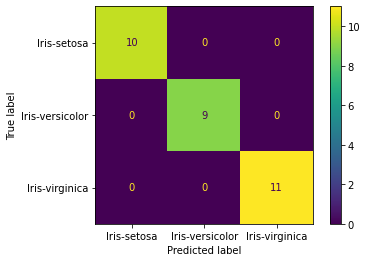

In [12]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_kNN), display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']).plot()

## Naive Bayes

Since the values are numerical and continuous, we use Gaussian model.

In [13]:
from  sklearn.naive_bayes import GaussianNB
Gaussian_model = GaussianNB()
Gaussian_model.fit(x_train, y_train)

GaussianNB()

In [14]:
Gaussian_model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [15]:
y_pred_NB = Gaussian_model.predict(x_test)

In [16]:
y_pred_NB_Train = Gaussian_model.predict(x_train)
print('Accuracy of the training set: ', accuracy_score(y_train, y_pred_NB_Train))
print('Accuracy of the testing set: ', accuracy_score(y_test, y_pred_NB))

Accuracy of the training set:  0.95
Accuracy of the testing set:  1.0


In [17]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



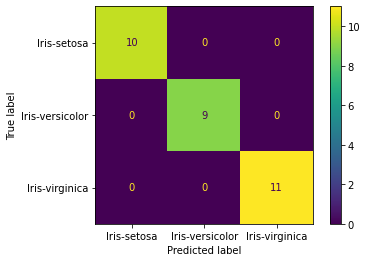

In [18]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_NB), display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']).plot()

## SVM

In [19]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
svm_classifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [20]:
y_pred_SVC = svm_classifier.predict(x_test)

In [21]:
y_pred_SVC_Train = svm_classifier.predict(x_train)
print('Accuracy of the training set: ', accuracy_score(y_train, y_pred_SVC_Train))
print('Accuracy of the testing set: ', accuracy_score(y_test, y_pred_SVC))

Accuracy of the training set:  0.9666666666666667
Accuracy of the testing set:  1.0


In [22]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



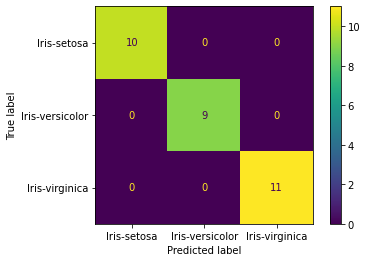

In [23]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_SVC), display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']).plot()

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()
LR_classifier.fit(x_train, y_train)
LR_classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
y_pred_LR = LR_classifier.predict(x_test)

In [26]:
y_pred_LR_Train = LR_classifier.predict(x_train)
print('Accuracy of the training set: ', accuracy_score(y_train, y_pred_LR_Train))
print('Accuracy of the testing set: ', accuracy_score(y_test, y_pred_LR))

Accuracy of the training set:  0.9666666666666667
Accuracy of the testing set:  1.0


In [27]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



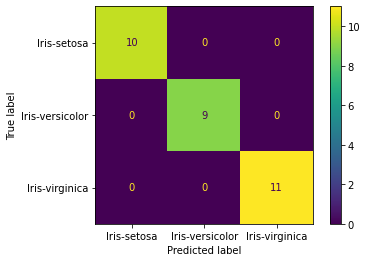

In [28]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_LR), display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']).plot()

## Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(x_train, y_train)
DT_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [30]:
y_pred_DT = DT_classifier.predict(x_test)
y_pred_DT

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [31]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



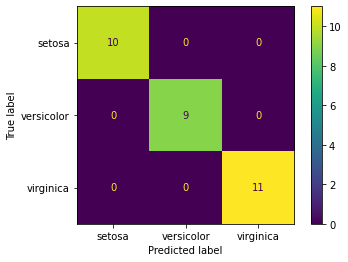

In [32]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_DT), display_labels=['setosa', 'versicolor', 'virginica']).plot()

[Text(0.3076923076923077, 0.9285714285714286, 'petal length (cm) <= -0.732\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length (cm) <= 0.586\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width (cm) <= 0.623\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width (cm) <= 0.756\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica'),
 Text(0.38461538461538464, 0.5, 'petal length (cm) <= 0.701\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\ncl

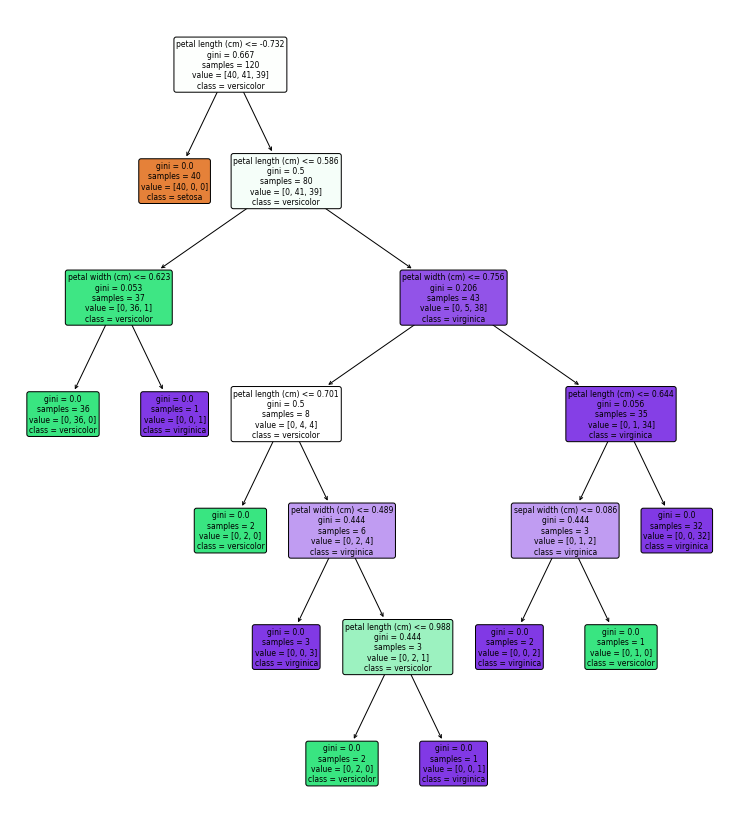

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(13,15))
plot_tree(DT_classifier, filled=True, feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], rounded=True, 
          class_names = ['setosa', 'versicolor', 'virginica'])

In [34]:
y_pred_DT_train = DT_classifier.predict(x_train)
print('Accuracy of the training set: ', accuracy_score(y_train, y_pred_DT_train))
print('Accuracy of the testing set: ', accuracy_score(y_test, y_pred_DT))

Accuracy of the training set:  1.0
Accuracy of the testing set:  1.0


## Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier()
RF_classifier.fit(x_train, y_train)
RF_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:
y_pred_RF = RF_classifier.predict(x_test)

In [37]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



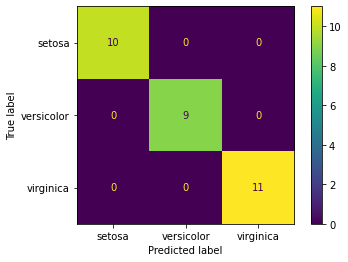

In [38]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_RF), display_labels=['setosa', 'versicolor', 'virginica']).plot()

In [39]:
y_pred_RF_train = RF_classifier.predict(x_train)
print('Accuracy of the training set: ', accuracy_score(y_train, y_pred_RF_train))
print('Accuracy of the testing set: ', accuracy_score(y_test, y_pred_RF))

Accuracy of the training set:  1.0
Accuracy of the testing set:  1.0


## Conclusion

The testing accuracy is 1.0 for all the algorithms. However, it can be seen that the training accuracy is highest in the case of Decision Tree and Random Forests with 1.0, closely followed by Logistic Regression and Support Vector with 0.967.